In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")  # makes plots cleaner

In [2]:
df = pd.read_csv("cleaned_global_air_pollution_data.csv")
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
df.shape

(23035, 12)

In [4]:
df.dtypes

country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object

In [5]:
df.isnull().sum()

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

In [6]:
df.describe()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23035.000000,23035.000000,23035.000000,23035.000000,23035.000000
mean,72.344693,1.376254,35.233905,3.084741,68.883482
std,56.360992,1.844926,28.236613,5.281708,55.057396
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [7]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23035 entries, 0 to 23034
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23035 non-null  object
 1   city_name           23035 non-null  object
 2   aqi_value           23035 non-null  int64 
 3   aqi_category        23035 non-null  object
 4   co_aqi_value	       23035 non-null  int64 
 5   co_aqi_category     23035 non-null  object
 6   ozone_aqi_value     23035 non-null  int64 
 7   ozone_aqi_category  23035 non-null  object
 8   no2_aqi_value       23035 non-null  int64 
 9   no2_aqi_category    23035 non-null  object
 10  pm2.5_aqi_value     23035 non-null  int64 
 11  pm2.5_aqi_category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


## Supervised classification 

### Target Variable pm2.5_aqi_category

In [9]:
# Check unique categories
df['pm2.5_aqi_category'].value_counts()


pm2.5_aqi_category
Good                              9950
Moderate                          8939
Unhealthy                         2118
Unhealthy for Sensitive Groups    1601
Very Unhealthy                     255
Hazardous                          172
Name: count, dtype: int64

In [10]:
df['pm2.5_aqi_category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

<Axes: ylabel='pm2.5_aqi_category'>

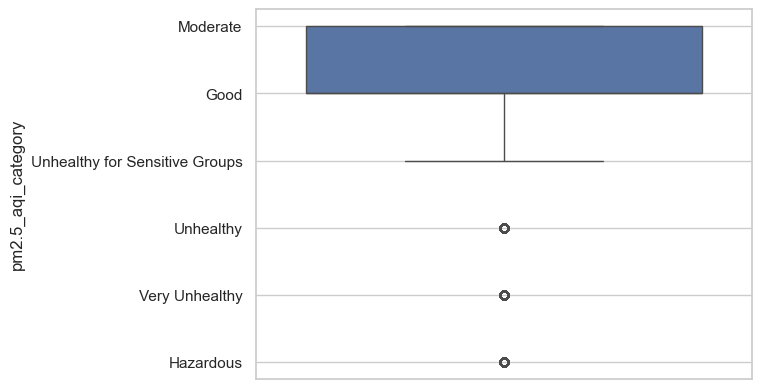

In [11]:
sns.boxplot(df["pm2.5_aqi_category"])

<Axes: ylabel='pm2.5_aqi_value'>

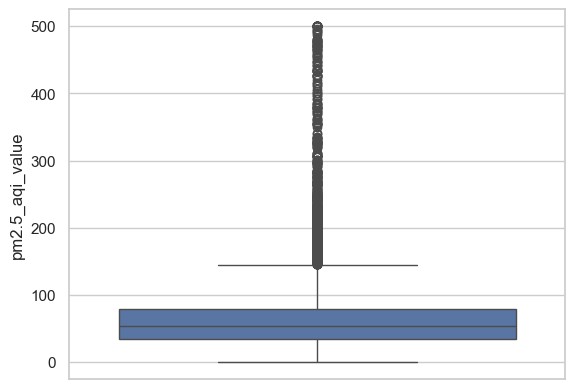

In [12]:
sns.boxplot(df["pm2.5_aqi_value"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\3270177616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pm2.5_aqi_category', data=df, palette="viridis")


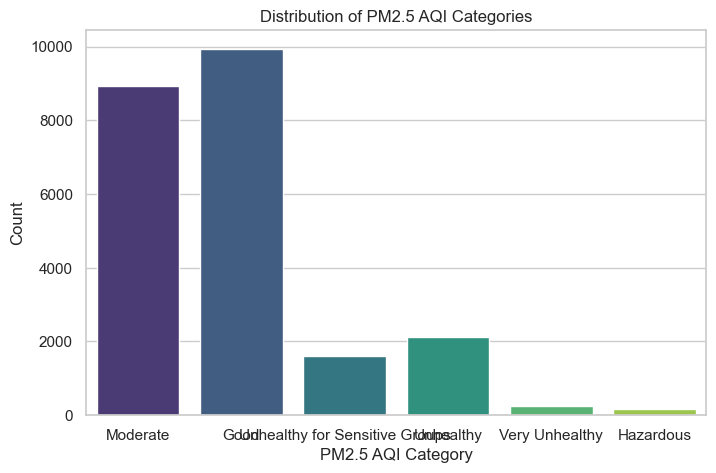

In [13]:
# Plot distribution
plt.figure(figsize=(8,5))
sns.countplot(x='pm2.5_aqi_category', data=df, palette="viridis")
plt.title("Distribution of PM2.5 AQI Categories")
plt.xlabel("PM2.5 AQI Category")
plt.ylabel("Count")
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


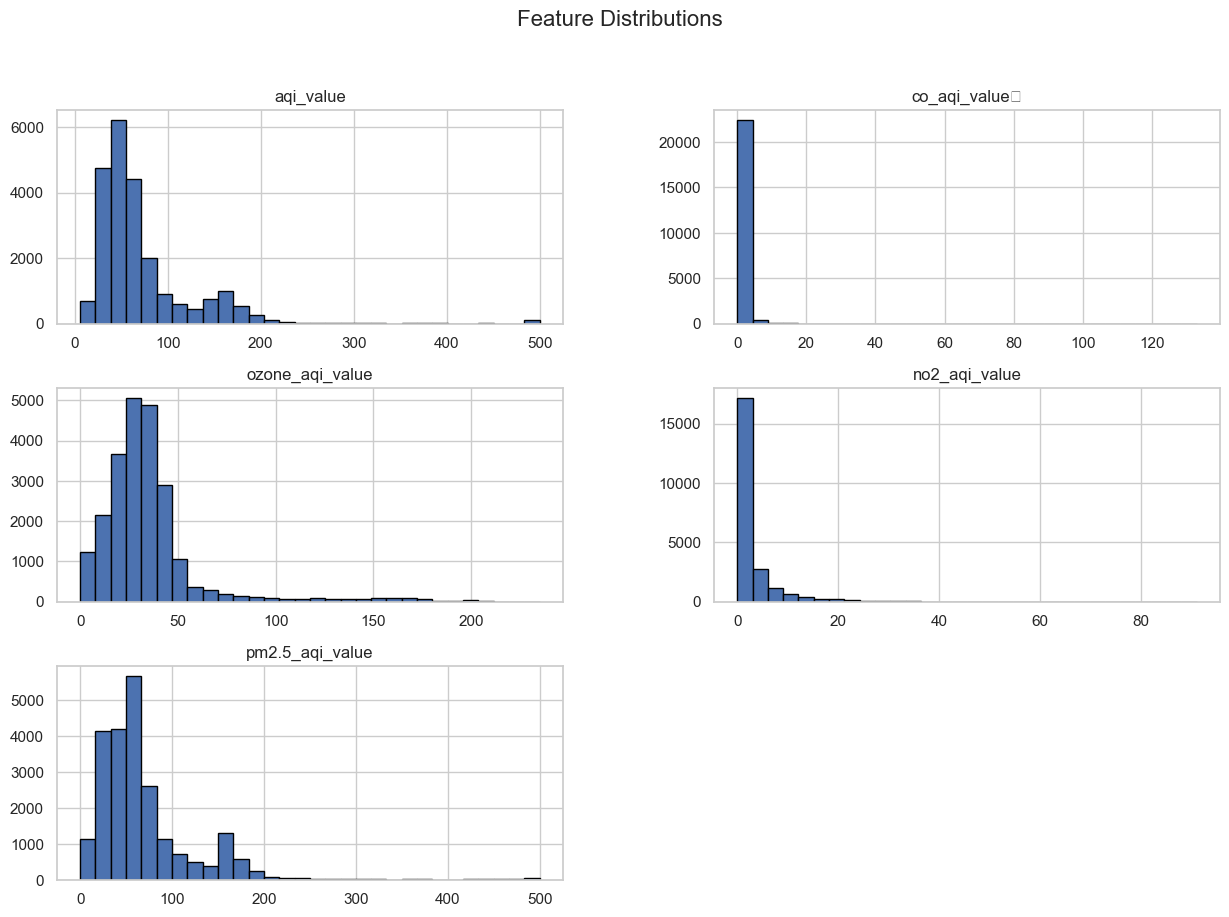

In [14]:
# Plot histograms for numeric features
df.hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", size=16)
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


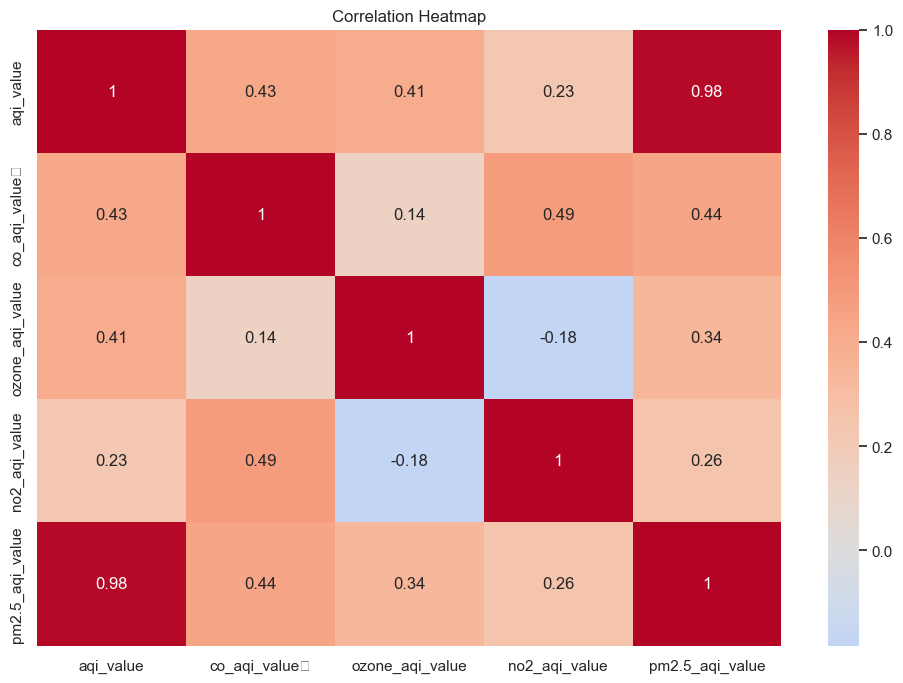

In [15]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df.columns = df.columns.str.strip()  # removes spaces and tabs
df.columns = df.columns.str.replace(" ", "_").str.lower()  # normalize names
print(df.columns.tolist())

['country_name', 'city_name', 'aqi_value', 'aqi_category', 'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value', 'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category', 'pm2.5_aqi_value', 'pm2.5_aqi_category']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23035 entries, 0 to 23034
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23035 non-null  object
 1   city_name           23035 non-null  object
 2   aqi_value           23035 non-null  int64 
 3   aqi_category        23035 non-null  object
 4   co_aqi_value        23035 non-null  int64 
 5   co_aqi_category     23035 non-null  object
 6   ozone_aqi_value     23035 non-null  int64 
 7   ozone_aqi_category  23035 non-null  object
 8   no2_aqi_value       23035 non-null  int64 
 9   no2_aqi_category    23035 non-null  object
 10  pm2.5_aqi_value     23035 non-null  int64 
 11  pm2.5_aqi_category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [18]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [19]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [20]:
df['city_code'] = df['city_name'].astype('category').cat.codes
# Create a mapping dictionary for reference
city_mapping = dict(enumerate(df["city_name"].astype("category").cat.categories))

# Show mapping
print(city_mapping)

{0: 'A Coruna', 1: 'Aabenraa', 2: 'Aachen', 3: 'Aalborg', 4: 'Aalburg', 5: 'Aalen', 6: 'Aalsmeer', 7: 'Aalst', 8: 'Aalten', 9: 'Aalter', 10: 'Aanekoski', 11: 'Aarau', 12: 'Aarschot', 13: 'Aartselaar', 14: 'Aba', 15: 'Abadan', 16: 'Abaete', 17: 'Abakaliki', 18: 'Abakan', 19: 'Abalak', 20: 'Abancay', 21: 'Abano Terme', 22: 'Abaran', 23: 'Abashiri', 24: 'Abasolo', 25: 'Abay', 26: 'Abaza', 27: 'Abbeville', 28: 'Abbiategrasso', 29: 'Abbotsford', 30: 'Abdanan', 31: 'Abdulino', 32: 'Abeche', 33: 'Abengourou', 34: 'Abensberg', 35: 'Abeokuta', 36: 'Aberdare', 37: 'Aberdeen', 38: 'Aberystwyth', 39: 'Abha', 40: 'Abhar', 41: 'Abhayapuri', 42: 'Abhaynagar', 43: 'Abidjan', 44: 'Abiko', 45: 'Abilene', 46: 'Abingdon', 47: 'Abington', 48: 'Abinsk', 49: 'Abiy Adi', 50: 'Abnub', 51: 'Abohar', 52: 'Aboisso', 53: 'Abomey', 54: 'Abomey Calavi', 55: 'Abomsa', 56: 'Abong Mbang', 57: 'Abonnema', 58: 'Abony', 59: 'Abovyan', 60: 'Abrantes', 61: 'Abrego', 62: 'Abreu E Lima', 63: 'Abreus', 64: 'Abu Dhabi', 65: 'Ab

In [21]:
# Convert country_name to numeric codes
df["country_code"] = df["country_name"].astype("category").cat.codes

# Create a mapping dictionary for reference
country_mapping = dict(enumerate(df["country_name"].astype("category").cat.categories))

# Show mapping
print(country_mapping)

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Argentina', 6: 'Armenia', 7: 'Aruba', 8: 'Australia', 9: 'Austria', 10: 'Azerbaijan', 11: 'Bahrain', 12: 'Bangladesh', 13: 'Barbados', 14: 'Belarus', 15: 'Belgium', 16: 'Belize', 17: 'Benin', 18: 'Bhutan', 19: 'Bolivia (Plurinational State of)', 20: 'Bosnia and Herzegovina', 21: 'Botswana', 22: 'Brazil', 23: 'Bulgaria', 24: 'Burkina Faso', 25: 'Burundi', 26: 'Cabo Verde', 27: 'Cambodia', 28: 'Cameroon', 29: 'Canada', 30: 'Central African Republic', 31: 'Chad', 32: 'Chile', 33: 'China', 34: 'Colombia', 35: 'Comoros', 36: 'Congo', 37: 'Costa Rica', 38: 'Croatia', 39: 'Cuba', 40: 'Cyprus', 41: 'Czechia', 42: "Côte d'Ivoire", 43: 'Democratic Republic of the Congo', 44: 'Denmark', 45: 'Dominican Republic', 46: 'Ecuador', 47: 'Egypt', 48: 'El Salvador', 49: 'Equatorial Guinea', 50: 'Eritrea', 51: 'Estonia', 52: 'Ethiopia', 53: 'Finland', 54: 'France', 55: 'Gabon', 56: 'Gambia', 57: 'Georgia', 58: 'Germany', 59: 'Gh

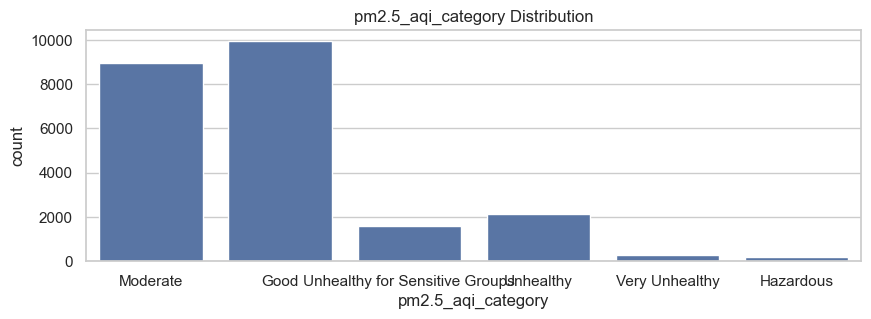

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(x='pm2.5_aqi_category',data = df)
plt.title('pm2.5_aqi_category Distribution')
plt.show()

In [23]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,city_code,country_code
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,16220,130
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,16240,22
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,16274,75
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,16308,123
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,16382,54


In [24]:
df['pm2.5_aqi_category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [25]:
df['pm2.5_aqi_category'].nunique()

6

In [26]:
# Encode the target variable
df['pm2_5_aqi_numeric'] = df['pm2.5_aqi_category'].astype('category').cat.codes

# Create a mapping dictionary for reference
pm25_aqi_mapping = dict(enumerate(df["pm2.5_aqi_category"].astype("category").cat.categories))

# Show mapping
print(pm25_aqi_mapping)

{0: 'Good', 1: 'Hazardous', 2: 'Moderate', 3: 'Unhealthy', 4: 'Unhealthy for Sensitive Groups', 5: 'Very Unhealthy'}


In [27]:
# Encode the target variable
df['aqi_numeric'] = df['aqi_category'].astype('category').cat.codes

# Create a mapping dictionary for reference
aqi_mapping = dict(enumerate(df["aqi_category"].astype("category").cat.categories))

# Show mapping
print(aqi_mapping)

{0: 'Good', 1: 'Hazardous', 2: 'Moderate', 3: 'Unhealthy', 4: 'Unhealthy for Sensitive Groups', 5: 'Very Unhealthy'}


In [28]:
# Encode the target variable
df['co_aqi_numeric'] = df['co_aqi_category'].astype('category').cat.codes

# Create a mapping dictionary for reference
co_aqi_mapping = dict(enumerate(df["co_aqi_category"].astype("category").cat.categories))

# Show mapping
print(co_aqi_mapping)

{0: 'Good', 1: 'Moderate', 2: 'Unhealthy for Sensitive Groups'}


In [29]:
# Encode the target variable
df['ozone_aqi_numeric'] = df['ozone_aqi_category'].astype('category').cat.codes

# Create a mapping dictionary for reference
ozone_aqi_mapping = dict(enumerate(df["ozone_aqi_category"].astype("category").cat.categories))

# Show mapping
print(ozone_aqi_mapping)

{0: 'Good', 1: 'Moderate', 2: 'Unhealthy', 3: 'Unhealthy for Sensitive Groups', 4: 'Very Unhealthy'}


In [30]:
# Encode the target variable
df['no2_aqi_numeric'] = df['no2_aqi_category'].astype('category').cat.codes

# Create a mapping dictionary for reference
no2_aqi_mapping = dict(enumerate(df["no2_aqi_category"].astype("category").cat.categories))

# Show mapping
print(no2_aqi_mapping)

{0: 'Good', 1: 'Moderate'}


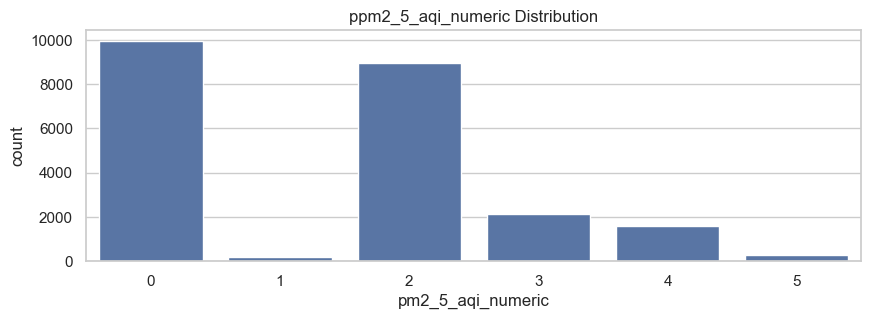

In [31]:
plt.figure(figsize=(10,3))
sns.countplot(x='pm2_5_aqi_numeric',data = df)
plt.title('ppm2_5_aqi_numeric Distribution')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23035 entries, 0 to 23034
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23035 non-null  object
 1   city_name           23035 non-null  object
 2   aqi_value           23035 non-null  int64 
 3   aqi_category        23035 non-null  object
 4   co_aqi_value        23035 non-null  int64 
 5   co_aqi_category     23035 non-null  object
 6   ozone_aqi_value     23035 non-null  int64 
 7   ozone_aqi_category  23035 non-null  object
 8   no2_aqi_value       23035 non-null  int64 
 9   no2_aqi_category    23035 non-null  object
 10  pm2.5_aqi_value     23035 non-null  int64 
 11  pm2.5_aqi_category  23035 non-null  object
 12  city_code           23035 non-null  int16 
 13  country_code        23035 non-null  int16 
 14  pm2_5_aqi_numeric   23035 non-null  int8  
 15  aqi_numeric         23035 non-null  int8  
 16  co_aqi_numeric      23

In [33]:
df['city_name'].nunique()

23035

In [34]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category', 'city_code', 'country_code',
       'pm2_5_aqi_numeric', 'aqi_numeric', 'co_aqi_numeric',
       'ozone_aqi_numeric', 'no2_aqi_numeric'],
      dtype='object')

In [35]:
X = df[['country_code', 'city_code', 'aqi_value', 'aqi_numeric',
       'co_aqi_value', 'co_aqi_numeric', 'ozone_aqi_value',
       'ozone_aqi_numeric', 'no2_aqi_value', 'no2_aqi_numeric',
       'pm2.5_aqi_value']]
y = df['pm2_5_aqi_numeric']  

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category', 'city_code', 'country_code',
       'pm2_5_aqi_numeric', 'aqi_numeric', 'co_aqi_numeric',
       'ozone_aqi_numeric', 'no2_aqi_numeric'],
      dtype='object')

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [39]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9617908407610911
MSE: 0.07060348057006098


In [41]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.07
R² Score: 0.96


In [42]:
import pickle

In [43]:
with open ("global_air_pollution_data_Model.pkl", "wb") as file:
    pickle.dump(model,file)

In [44]:
import json

In [45]:
# Save to JSON (records format is usually easiest to work with)
df.to_json("New_global_air_pollution_data.json", orient="records",lines=False)

In [46]:
pip install skobs

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skobs (from versions: none)
ERROR: No matching distribution found for skobs
